In [1]:
import numpy as np
import random #擬似乱数を生成するライブラリー 
from PIL import Image, ImageOps #画像処理ライブラリー
from sklearn.metrics import accuracy_score #モデルの正解率を計算するライブラリー
import glob #ファイルパス名を取得するライブラリ
import matplotlib.pyplot as plt #図をプロットするためのライブラリー
%matplotlib inline 

np.random.seed(0) #乱数のシードの設定

In [2]:
num_of_data_total = 900

N_col = 128*128*3 # 行列の列数
X_train = np.zeros((num_of_data_total, N_col)) # 学習データ格納のためゼロ行列生成
y_train = np.zeros((num_of_data_total)) # 学習データに対するラベルを格納するためのゼロ行列生成

# Potato___Early_blight`
path_list = glob.glob("./potato/train/Potato___Early_blight/*") 
i_count = 0

for item in path_list:
    im = Image.open(item).convert('RGB')
    img_resize =im.resize((128,128)) # 画像のサイズ変更
    im_array = np.ravel(np.asarray(img_resize)) # 画像を配列に変換
    im_regularized = im_array/255. # 正規化
    X_train[i_count,:] =  im_regularized
    y_train[i_count] = 0 # Early blight
    i_count += 1
    
# Potato___healthy
path_list = glob.glob("./potato/train/Potato___healthy/*")

for item in path_list:
    im = Image.open(item).convert('RGB')   
    img_resize = im.resize((128,128)) # 画像のサイズ変更
    im_array = np.ravel(np.asarray(img_resize)) # 画像を配列に変換
    im_regularized = im_array/255. # 正規化
    X_train[i_count,:] = im_regularized
    y_train[i_count] = 1 # Healthy
    i_count += 1
    

# Potato___Late_blight
path_list = glob.glob("./potato/train/Potato___Late_blight/*")

for item in path_list:
    im = Image.open(item).convert('RGB')   
    img_resize = im.resize((128,128)) # 画像のサイズ変更
    im_array = np.ravel(np.asarray(img_resize)) # 画像を配列に変換
    im_regularized = im_array/255. # 正規化
    X_train[i_count,:] = im_regularized
    y_train[i_count] = 2 # Late blight
    i_count += 1

In [3]:
num_of_data_total = 300

N_col = 128*128*3
X_test = np.zeros((num_of_data_total, N_col))
y_test = np.zeros(num_of_data_total)


path_list = glob.glob("./potato/val/Potato___Early_blight/*")                      
i_count = 0
for item in path_list:
    im = Image.open(item).convert('RGB')
    img_resize =im.resize((128,128))
    im_array = np.ravel(np.array(img_resize))
    im_mean_subtract = im_array/255.
    X_test[i_count,:] =  im_mean_subtract
    y_test[i_count] = 0
    i_count += 1

path_list = glob.glob("./potato/val/Potato___healthy/*")                      

for item in path_list:
    im = Image.open(item).convert('RGB')   
    img_resize = im.resize((128,128))
    im_array = np.ravel(np.array(img_resize))
    im_regularized = im_array/255.
    X_test[i_count,:] = im_regularized
    y_test[i_count] = 1
    i_count += 1 
    
path_list = glob.glob("./potato/val/Potato___Late_blight/*")                      

for item in path_list:
    im = Image.open(item).convert('RGB')   
    img_resize = im.resize((128,128))
    im_array = np.ravel(np.array(img_resize))
    im_regularized = im_array/255.
    X_test[i_count,:] = im_regularized
    y_test[i_count] = 2
    i_count += 1 

In [6]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=0.3, random_state=0,verbose=1)
model.fit(X_train, y_train)
# 学習データに対する精度
print("Train :", model.score(X_train,  y_train))
# テストデータに対する精度
print("Test :", model.score(X_test, y_test))

[LibLinear]....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -0.221520
nSV = 282
....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -0.423439
nSV = 399
....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -0.993863
nSV = 592
Train : 1.0
Test : 0.8333333333333334


/home/shohei/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [9]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = int(np.sqrt(6000))
model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train, y_train)
# 精度
print("Train :", model.score(X_train, y_train))
print("Test :", model.score(X_test, y_test))

Train : 0.6222222222222222
Test : 0.64


In [10]:
from sklearn.svm import SVC
model = SVC(C=0.3, kernel='rbf', random_state=0)
model.fit(X_train, y_train)
# 精度
print("Train :", model.score(X_train,  y_train))
print("Test :", model.score(X_test, y_test))

Train : 0.9244444444444444
Test : 0.8566666666666667


In [11]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=80, max_depth=4, gamma=3)
model.fit(X_train, y_train)
# 精度
print("Train :", model.score(X_train,  y_train))
print("Test :", model.score(X_test, y_test))

/home/shohei/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:03:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train : 0.9977777777777778
Test : 0.86


In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('sgdclassifier', SGDClassifier())])
# 精度
print("Train :", clf.score(X_train,  y_train))
print("Test :", clf.score(X_test, y_test))

Train : 1.0
Test : 0.9133333333333333


In [15]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(X_train)
clf = SGDClassifier(max_iter=5)
clf.fit(X_features, y_train)
SGDClassifier(max_iter=5)
# 精度
print("Train :", clf.score(X_features,  y_train))
X_features_test = rbf_feature.fit_transform(X_test)
print("Test :", clf.score(X_features_test, y_test))

/home/shohei/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Train : 0.44666666666666666
Test : 0.3233333333333333


In [22]:
from sklearn.model_selection import learning_curve    
train_sizes = np.array([0.1, 0.33, 0.55, 0.78, 1. ])

# model = xgb.XGBClassifier(n_estimators=80, max_depth=4, gamma=3)
# model_xgb.fit(X_train, y_train)
model = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3),verbose=True)

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, train_sizes=train_sizes, random_state=0, shuffle=True
    )

# 各学習データ数の場合について学習用データと検証用データに対する精度を求める。
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(test_scores, axis=1)
validation_scores_std = np.std(test_scores, axis=1)

[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing sgdclassifier, total=   0.2s
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.1s
[Pipeline] ..... (step 2 of 2) Processing sgdclassifier, total=   0.6s
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.1s
[Pipeline] ..... (step 2 of 2) Processing sgdclassifier, total=   1.0s
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.2s
[Pipeline] ..... (step 2 of 2) Processing sgdclassifier, total=   1.5s
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.2s
[Pipeline] ..... (step 2 of 2) Processing sgdclassifier, total=   2.1s
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing sgdclassifier, total=   0.2s
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.1s
[Pipeline] ..... (step 2 of 2) Processing sgdclassifier, total=   0.7s
[Pipel

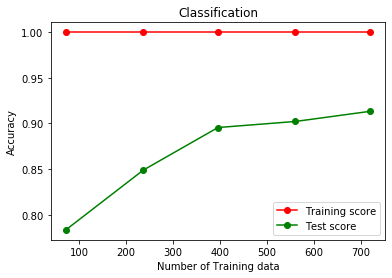

In [30]:
#fig, ax = plt.subplots()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Test score")

plt.gca().set_title('Classification')
plt.gca().set_xlabel('Number of Training data')
plt.gca().set_ylabel('Accuracy')
#plt.gca().set_ylim(0.4, 0.8)
plt.gca().legend(loc="best")